In [1]:
import cv2
import numpy as np
import mediapipe as mp
import time
import os
from matplotlib import pyplot as plt

In [2]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [5]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             )
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             )
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             )
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [6]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()

        image, results = mediapipe_detection(frame, holistic)
        
        draw_styled_landmarks(image, results)

        cv2.imshow("Camera Feed", image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [7]:
results

mediapipe.python.solution_base.SolutionOutputs

In [8]:
draw_styled_landmarks(frame, results)

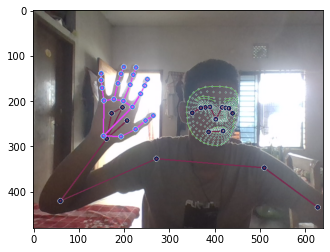

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [10]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [11]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [12]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [13]:
extract_keypoints(results)

array([ 0.63097847,  0.50114292, -1.00032794, ...,  0.23454949,
        0.29009098, -0.02910989])

In [14]:
DATA_PATH = os.path.join('MP_Data')
actions = np.array(["hello", "thanks", "i love you"])
no_sequences = 30
sequence_length = 30

In [ ]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [ ]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
                
        
                ret, frame = cap.read()

                image, results = mediapipe_detection(frame, holistic)

                draw_styled_landmarks(image, results)
                
                if frame_num == 0:
                    cv2.putText(image, "Starting Collection", (120,200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, "Collecting Frame for {} video number {}".format(action, sequence), (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, "Collecting Frame for {} video number {}".format(action, sequence), (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                cv2.imshow("Camera Feed", image)
                
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

    cap.release()
    cv2.destroyAllWindows()

In [15]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [16]:
label_map = {label:num for num, label in enumerate(actions)}

In [17]:
label_map

{'hello': 0, 'thanks': 1, 'i love you': 2}

In [18]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [19]:
X = np.array(sequences)

In [20]:
X.shape

(90, 30, 1662)

In [21]:
y = to_categorical(labels).astype(int)

In [23]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import load_model

In [26]:
cap.release()
cv2.destroyAllWindows()

In [30]:
log_dir = os.path.join("Logs")
tb_callback = TensorBoard(log_dir=log_dir)

In [31]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [32]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [33]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 4s 146ms/step - loss: 1.6207 - categorical_accuracy: 0.3647
Epoch 2/2000
3/3 [==============================] - 0s 118ms/step - loss: 14.5098 - categorical_accuracy: 0.4235
Epoch 3/2000
3/3 [==============================] - 0s 128ms/step - loss: 10.0100 - categorical_accuracy: 0.3882
Epoch 4/2000
3/3 [==============================] - 0s 112ms/step - loss: 8.9993 - categorical_accuracy: 0.3647
Epoch 5/2000
3/3 [==============================] - 0s 112ms/step - loss: 16.1693 - categorical_accuracy: 0.3765
Epoch 6/2000
3/3 [==============================] - 0s 111ms/step - loss: 26.4334 - categorical_accuracy: 0.3647
Epoch 7/2000
3/3 [==============================] - 0s 111ms/step - loss: 17.4603 - categorical_accuracy: 0.4000
Epoch 8/2000
3/3 [==============================] - 0s 112ms/step - loss: 28.4049 - categorical_accuracy: 0.2941
Epoch 9/2000
3/3 [==============================] - 0s 112ms/step - loss: 32.4033 - categorical_ac

3/3 [==============================] - 0s 113ms/step - loss: 0.4403 - categorical_accuracy: 0.8471
Epoch 146/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.3696 - categorical_accuracy: 0.8941
Epoch 147/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.3858 - categorical_accuracy: 0.8706
Epoch 148/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.4175 - categorical_accuracy: 0.8824
Epoch 149/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.3759 - categorical_accuracy: 0.8824
Epoch 150/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.3587 - categorical_accuracy: 0.9059
Epoch 151/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.3879 - categorical_accuracy: 0.8706
Epoch 152/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.3253 - categorical_accuracy: 0.9176
Epoch 153/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.3403 - categorical_accura

Epoch 217/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.2883 - categorical_accuracy: 0.8941
Epoch 218/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.3311 - categorical_accuracy: 0.9059
Epoch 219/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.2696 - categorical_accuracy: 0.9176
Epoch 220/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.2560 - categorical_accuracy: 0.9176
Epoch 221/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.2554 - categorical_accuracy: 0.9176
Epoch 222/2000
3/3 [==============================] - 0s 116ms/step - loss: 0.2621 - categorical_accuracy: 0.9294
Epoch 223/2000
3/3 [==============================] - 0s 131ms/step - loss: 0.2649 - categorical_accuracy: 0.9059
Epoch 224/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.2457 - categorical_accuracy: 0.9412
Epoch 225/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.2511 - cat

Epoch 360/2000
3/3 [==============================] - 0s 162ms/step - loss: 0.1564 - categorical_accuracy: 0.9412
Epoch 361/2000
3/3 [==============================] - 0s 128ms/step - loss: 0.3117 - categorical_accuracy: 0.8941
Epoch 362/2000
3/3 [==============================] - 0s 154ms/step - loss: 0.2403 - categorical_accuracy: 0.9294
Epoch 363/2000
3/3 [==============================] - 0s 140ms/step - loss: 0.3257 - categorical_accuracy: 0.8706
Epoch 364/2000
3/3 [==============================] - 0s 154ms/step - loss: 0.2311 - categorical_accuracy: 0.9176
Epoch 365/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.3893 - categorical_accuracy: 0.8235
Epoch 366/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.8467 - categorical_accuracy: 0.7529
Epoch 367/2000
3/3 [==============================] - 0s 116ms/step - loss: 0.4741 - categorical_accuracy: 0.8353
Epoch 368/2000
3/3 [==============================] - 0s 145ms/step - loss: 0.6402 - cat

KeyboardInterrupt: 

In [52]:
model = load_model('action_2.h5')

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

In [54]:
ress = model.predict(X_test)

1/1 [==============================] - 0s 455ms/step


In [32]:
model.save("action_3.h5")

In [55]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [56]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 39ms/step


In [57]:
yhat

array([[9.9029166e-01, 6.4057596e-03, 3.3025637e-03],
       [1.0220234e-03, 2.1655972e-03, 9.9681240e-01],
       [9.8562288e-01, 8.8570593e-03, 5.5200709e-03],
       [9.9635470e-01, 1.7767540e-03, 1.8685259e-03],
       [3.5675240e-03, 5.7823828e-04, 9.9585426e-01]], dtype=float32)

In [58]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [59]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 0],
        [0, 3]],

       [[3, 0],
        [0, 2]]], dtype=int64)

In [60]:
accuracy_score(ytrue, yhat)

1.0

In [61]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [62]:
sequence = []
sentence = []
predictions = []
threshold = 0.6

cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()

        image, results = mediapipe_detection(frame, holistic)
        
        draw_styled_landmarks(image, results)
        
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)]) 
            predictions.append(np.argmax(res))
            
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 

                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)    
            
        cv2.imshow("Camera Feed", image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

1/1 [==============================] - 0s 23ms/step
hello
1/1 [==============================] - 0s 21ms/step
hello
1/1 [==============================] - 0s 22ms/step
hello
1/1 [==============================] - 0s 22ms/step
hello
1/1 [==============================] - 0s 27ms/step
i love you
1/1 [==============================] - 0s 22ms/step
i love you
1/1 [==============================] - 0s 22ms/step
i love you
1/1 [==============================] - 0s 22ms/step
i love you
1/1 [==============================] - 0s 22ms/step
i love you
1/1 [==============================] - 0s 24ms/step
i love you
1/1 [==============================] - 0s 38ms/step
i love you
1/1 [==============================] - 0s 22ms/step
i love you
1/1 [==============================] - 0s 22ms/step
i love you
1/1 [==============================] - 0s 23ms/step
i love you
1/1 [==============================] - 0s 25ms/step
i love you
1/1 [==============================] - 0s 23ms/step
i love you
1/1 [=======

1/1 [==============================] - 0s 23ms/step
i love you
1/1 [==============================] - 0s 36ms/step
i love you
1/1 [==============================] - 0s 22ms/step
i love you
1/1 [==============================] - 0s 23ms/step
i love you
1/1 [==============================] - 0s 24ms/step
thanks
1/1 [==============================] - 0s 40ms/step
thanks
1/1 [==============================] - 0s 22ms/step
thanks
1/1 [==============================] - 0s 23ms/step
i love you
1/1 [==============================] - 0s 39ms/step
i love you
1/1 [==============================] - 0s 36ms/step
i love you
1/1 [==============================] - 0s 22ms/step
i love you
1/1 [==============================] - 0s 22ms/step
i love you
1/1 [==============================] - 0s 22ms/step
i love you
1/1 [==============================] - 0s 22ms/step
i love you
1/1 [==============================] - 0s 22ms/step
i love you
1/1 [==============================] - 0s 24ms/step
i love you
1/1 